# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run
%reload_ext autoreload
%autoreload 2

# local modules
import inauguralproject
import gade

# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [8]:
# code for solving the model (remember documentation and comments)
solution = gade.ConsumerProblem()

print(solution.optimizer()[3])

Labour is: 0.3196, Consumption is: 1.1199 and utility is: 0.0968
Labour is: 0.4645, Consumption is: 1.1561 and utility is: 0.1283


# Question 2

ADD ANSWER.

<function matplotlib.pyplot.show(*args, **kw)>

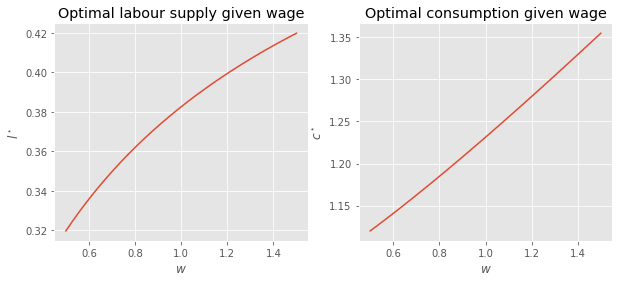

In [20]:
# code
plt.style.use('ggplot')

density = 1000

w_vec = np.linspace(0.5, 1.5, num=density) #establishing a uniform distributed wage variable 
l_opt = np.empty(density)
c_opt = np.empty(density)

for i in range(0,len(w_vec)):
    solution.w = w_vec[i]
    l_opt[i] = solution.optimizer()[0]
    c_opt[i] = solution.optimizer()[1]
   
#Creating the figure:    
fig = plt.figure(figsize=(10,4))

# Left plot
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_vec,l_opt)

ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# Right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_vec,c_opt)

ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

plt.show   

# Question 3 & 4

ADD ANSWER.

In [33]:
# code
print(solution.tax()) # Print tax revenue for epsilon = 0.3 (Defult)
solution.eps = 0.1
print(solution.tax()) # Print tax revenue for epsilon = 0.1


1907.6221338278253
3650.4611348980075


# Question 5

In [47]:
# code (made with loop)

ops = gade.ConsumerProblem() # Optimal Parameter Settings 

np.random.seed(117)

# Define the optimal parameter settings and the given tax
kappa_star = 0
tau0_star = 0
tau1_star = 0
Tax_star=0

# Define the accuracy of the parameters

A = 0.1
end = 1+A

#The loop
for h in np.arange(0,end,A):
    ops.kappa = h
    for j in np.arange(0,end,A):
        ops.tau_1 = j
        for i in np.arange(0,end,A):
            ops.tau_0=i
            
            tax_rev = ops.tax(N=10) # For convenience we set Population = 10

            if tax_rev > Tax_star:
                Tax_star = tax_rev
                kappa_star = h
                tau1_star = j
                tau0_star = i

print('Kappa should be: ' + str(kappa_star))
print('Tau0 should be: ' + str(tau0_star))
print('Tau1 should be: ' + str(tau1_star))
print('Tax Revenue would then be ' + str(Tax_star))


Kappa should be: 0.0
Tau0 should be: 0.0
Tau1 should be: 0.8
Tax Revenue would then be 2.855578371473454


In [46]:
# code (Note need this tho its not the total same result)

ops = gade.ConsumerProblem() # Optimal Parameter Settings 

np.random.seed(117)

# Define the optimal parameter settings and the given tax
kappa_star = 0
tau0_star = 0
tau1_star = 0
Tax_star=0

# Define the accuracy of the parameters
m = 1 #cash-on-hand
v = 10 #disutility of labor
eps = 0.3 #elasticity of labor supply
tau_0 = 0.4 #standard labor income tax
tau_1 = 0.1 #top bracket labor income tax
kappa = 0.4 #cut-off for top labor income tax

for h in range(0,11,1):
    h /=10
    kappa = h
    #print('Kappa is: ' + str(kappa))
    for j in range(0,11,1):
        j /= 10
        tau_1 = j
        #print('Tau1 is :' + str(tau_1))
        for i in range(0,11,1):
            i /= 10
            tau_0=i
            #print('Tau0 is :' + str(tau_0))
            N=10
            w_vec = np.random.uniform(0.5, 1.5, size=N)
            l_opt_new = np.empty(N)
            c_opt_new = np.empty(N)
            tax_rev_new=0

            for a,w in enumerate(w_vec):
                opt = inauguralproject.optimizer(w,eps,v,tau_0,tau_1,kappa,m)
                l_opt_new[a] = opt[0]
                c_opt_new[a] = opt[1]

            new_tax = lambda l_opt_new, w_vec: tau_0*w_vec*l_opt_new + tau_1*np.max(w_vec*l_opt_new-kappa,0)
            tax_rev_new=new_tax(l_opt_new,w_vec)

            np.sum(tax_rev_new)
            #print('Tax revenue is: ' + str(np.sum(tax_rev_new)))
            if np.sum(tax_rev_new) > Tax_star:
                Tax_star = np.sum(tax_rev_new)
                kappa_star = h
                tau1_star = j
                tau0_star = i
                #print(tau0_star)
                #print(Tax_star)

print('Tax revenue will be: ' + str(Tax_star))
print('Tau1 should be: ' + str(tau1_star))
print('Tau0 should be: ' + str(tau0_star))
print('Kappa should be: ' + str(kappa_star))


Tax revenue will be: 4.044197971038415
Tau1 should be: 0.8
Tau0 should be: 0.0
Kappa should be: 0.0


# Conclusion

ADD CONCISE CONLUSION.